23


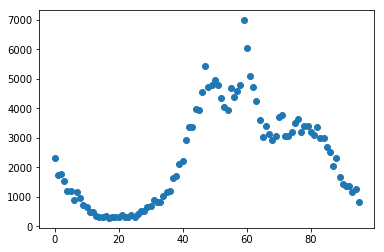

In [13]:
import csv
import datetime
import math
import dateutil.relativedelta
import matplotlib.pyplot as plt 

with open('outputwireless-logs-20120407.DHCP_ANON.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter = ',')
    times = []
    for row in readCSV:
        time = row[4]
        times.append(time)
del times[0]
late_u = 1333843425
early_u = 1333757183

dt_late = datetime.datetime.fromtimestamp(late_u) #convert from unix timestamp to datetime 
dt_early = datetime.datetime.fromtimestamp(early_u) #convert from unix timestamp to datetime

rd = dateutil.relativedelta.relativedelta (dt_late, dt_early) #compute the difference between the two datetimes 

print(rd.hours)

tot_time = 1440 #Total number of mins
n = 15 #Number of mins bin 

n_bins = tot_time/n #compute the number of bins
plt.figure()
y = []

x = []

for i in range(96):
    y.append(0)
    
for i in range(96):
    x.append(i)

counter = 0 
for i in times: 
    dt_comp = datetime.datetime.fromtimestamp(int(i))
    diff = dateutil.relativedelta.relativedelta (dt_comp, dt_early)
    total_diff = 0
    total_diff = total_diff + diff.hours*60 + diff.minutes
    bin_num = math.floor(total_diff/n)
    y[bin_num] = y[bin_num] + 1
    
plt.scatter(x,y) 
plt.show()
    
    

